# Optional Lab - ReLU activation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from autils import plt_act_trio
from lab_utils_relu import *
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)


<a name="2"></a>
## 2 - Activación ReLU
Esta semana se ha presentado una nueva activación, la Unidad Lineal Rectificada (ReLU).

$$ a = max(0,z) \quad\quad\text {# ReLU function} $$

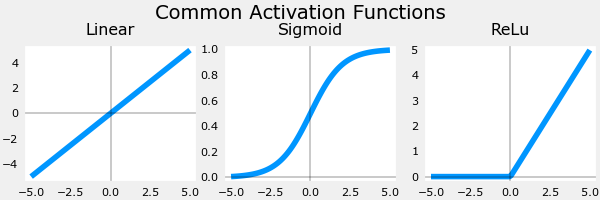

In [2]:
plt_act_trio()

<img align="right" src="./images/C2_W2_ReLu.png"     style=" width:380px; padding: 10px 20px; " >
El ejemplo de la conferencia de la derecha muestra una aplicación del ReLU. En este ejemplo, la característica derivada "conciencia" no es binaria, sino que tiene un rango continuo de valores. La sigmoidea es mejor para situaciones de encendido/apagado o binarias. El ReLU proporciona una relación lineal continua. Además, tiene un rango "off" en el que la salida es cero.     
La característica "off" hace que el ReLU sea una activación no lineal. ¿Por qué es necesario esto? Examinemos esto a continuación. 

### ¿Por qué las activaciones no lineales?  
<img align="left" src="./images/C2_W2_ReLU_Graph.png"     style=" width:250px; padding: 10px 20px; " > La función mostrada se compone de trozos lineales (piecewise linear). La pendiente es constante durante la parte lineal y luego cambia bruscamente en los puntos de transición. En los puntos de transición, se añade una nueva función lineal que, al sumarse a la función existente, producirá la nueva pendiente. La nueva función se añade en el punto de transición pero no contribuye a la salida antes de ese punto. La función de activación no lineal se encarga de desactivar la entrada antes y a veces después de los puntos de transición. El siguiente ejercicio proporciona un ejemplo más tangible.

En el ejercicio se utilizará la red que aparece a continuación en un problema de regresión en el que se debe modelar un objetivo lineal a trozos :
<img align="center" src="./images/C2_W2_ReLU_Network.png"     style=" width:650px; padding: 10px 20px; ">  
La red tiene 3 unidades en la primera capa. Cada una es necesaria para formar el objetivo. La unidad 0 está preprogramada y fijada para mapear el primer segmento. Se modifican los pesos y los sesgos en las unidades 1 y 2 para modelar el segundo y tercer segmento. La unidad de salida también es fija y simplemente suma las salidas de la primera capa.  

Usando los deslizadores de abajo, modifique los pesos y el sesgo para que coincidan con el objetivo. 
Sugerencias: Empiece con `w1` y `b1` y deje `w2` y `b2` a cero hasta que coincida con el 2º segmento. Es más rápido hacer clic en lugar de deslizar.  Si tiene problemas, no se preocupe, el texto de abajo lo describirá con más detalle.

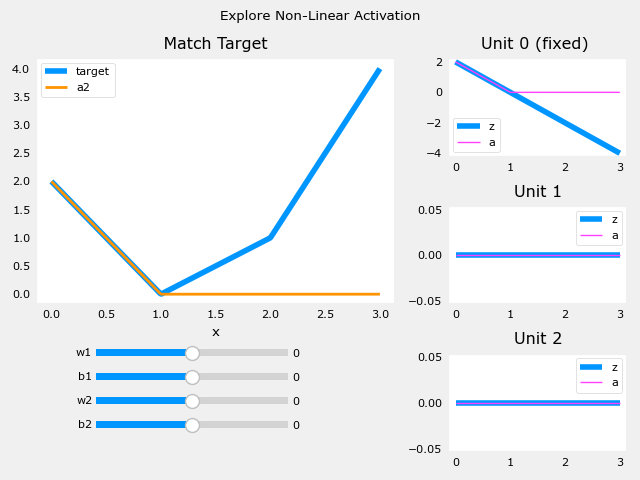

In [3]:
_ = plt_relu_ex()

 
El objetivo de este ejercicio es apreciar cómo el comportamiento no lineal de ReLU proporciona la capacidad necesaria para desactivar funciones hasta que se necesiten. Veamos cómo ha funcionado en este ejemplo.
<img align="right" src="./images/C2_W2_ReLU_Plot.png"     style=" width:600px; padding: 10px 20px; "> 
Los gráficos de la derecha contienen la salida de las unidades de la primera capa.   
Empezando por arriba, la unidad 0 es responsable del primer segmento marcado con un 1. Se muestran tanto la función lineal $z$ como la función que sigue el ReLU $a$. Se puede ver que el ReLU corta la función después del intervalo [0,1]. Esto es importante ya que evita que la unidad 0 interfiera en el siguiente segmento. 

La unidad 1 es responsable del segundo segmento. Aquí el ReLU mantuvo esta unidad tranquila hasta después de que x es 1. Dado que la primera unidad no está contribuyendo, la pendiente para la unidad 1, $w^{[1]}_1$, es sólo la pendiente de la línea objetivo. El sesgo debe ser ajustado para mantener la salida negativa hasta que x ha llegado a 1. Observe cómo la contribución de la unidad 1 se extiende al 3er segmento también.

La unidad 2 es responsable del 3er segmento. La ReLU vuelve a poner a cero la salida hasta que x alcance el valor correcto.La pendiente de la unidad, $w^{[1]}_2$, debe ajustarse para que la suma de la unidad 1 y 2 tenga la pendiente deseada. El sesgo se ajusta de nuevo para mantener la salida negativa hasta que x haya alcanzado 2. 

La característica "off" o de desactivación de la activación ReLU permite a los modelos coser segmentos lineales para modelar funciones no lineales complejas.


## Congratulations!
You are now more familiar with the ReLU and the importance of its non-linear behavior.